In [1]:
from utils import name_id_pairs, aggr_venues, get_vector, generate_bov_year
import matplotlib.pyplot as plt
import numpy as np

/Users/minjeongshin/miniconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/Users/minjeongshin/miniconda2/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/Users/minjeongshin/miniconda2/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/Users/minjeongshin/miniconda2/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, 

In [2]:
year_data = generate_bov_year()

In [3]:
## calculate total bag of venue
bag_of_venues = set()
sorted_list_bov = list()
for name, y_venues in year_data.items():
    venues = aggr_venues(y_venues)
    print("{}: len(papers)={}, len(venues)={}, len(set(venues))={}"
        .format(name, sum(name_id_pairs[name]["numpaper"].values()), len(venues), len(set(venues))))
    print(name_id_pairs[name]["numpaper"])
    [bag_of_venues.add(v) for v in venues]
sorted_list_bov = list(bag_of_venues)
number_of_venues = len(sorted_list_bov)
print("Total # of venues = ", number_of_venues)

WWW: len(papers)=6556, len(venues)=8295, len(set(venues))=1404
{1987: 1, 1988: 1, 1990: 1, 1993: 2, 1994: 66, 1995: 90, 1996: 103, 1997: 104, 1998: 164, 1999: 97, 2000: 116, 2001: 209, 2002: 163, 2003: 355, 2004: 317, 2005: 319, 2006: 262, 2007: 294, 2008: 294, 2009: 250, 2010: 283, 2011: 275, 2012: 391, 2013: 457, 2014: 429, 2015: 477, 2016: 381, 2017: 445, 2018: 210}
ICML: len(papers)=6350, len(venues)=8389, len(set(venues))=1094
{1984: 1, 1987: 12, 1988: 51, 1989: 138, 1990: 51, 1991: 126, 1992: 69, 1993: 45, 1994: 47, 1995: 75, 1996: 80, 1997: 61, 1998: 73, 1999: 63, 2000: 179, 2001: 85, 2002: 95, 2003: 146, 2004: 160, 2005: 222, 2006: 208, 2007: 190, 2008: 209, 2009: 195, 2010: 276, 2011: 259, 2012: 288, 2013: 366, 2014: 323, 2015: 380, 2016: 425, 2017: 723, 2018: 729}
CIKM: len(papers)=5402, len(venues)=8764, len(set(venues))=1102
{1992: 30, 1993: 98, 1994: 67, 1995: 65, 1996: 64, 1997: 70, 1998: 61, 1999: 95, 2000: 82, 2001: 104, 2002: 108, 2003: 94, 2004: 112, 2005: 181, 2006: 

In [31]:
## generate year_bov for each entity
avg_year_vec = {}
vec = {}
for cname, y_venues in year_data.items():
    avg_year_vec[cname] = np.zeros(number_of_venues)
    for y, ref in y_venues.items():
        vec["{}_{}".format(cname, y)] = get_vector(cname, sorted_list_bov, ref, year=y)
        avg_year_vec[cname] += vec["{}_{}".format(cname, y)]
    avg_year_vec[cname] /= len(y_venues)

In [32]:
avg_year_vec

{'AAAI': array([3.45614156e-05, 3.45614156e-05, 2.84722862e-04, ...,
        0.00000000e+00, 5.09943906e-05, 0.00000000e+00]),
 'ASPLOS': array([0., 0., 0., ..., 0., 0., 0.]),
 'CIKM': array([0.        , 0.        , 0.00075651, ..., 0.        , 0.        ,
        0.        ]),
 'ICML': array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 8.382581e-05,
        0.000000e+00, 0.000000e+00]),
 'ICWSM': array([0.        , 0.        , 0.        , ..., 0.00209718, 0.        ,
        0.        ]),
 'ISCA': array([0.        , 0.        , 0.        , ..., 0.00019666, 0.        ,
        0.        ]),
 'MICRO': array([0., 0., 0., ..., 0., 0., 0.]),
 'NIPS': array([7.99232737e-05, 3.27225131e-05, 8.95415473e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'OOPSLA': array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00021259]),
 'OSDI': array([0., 0., 0., ..., 0., 0., 0.]),
 'PLDI': array([0., 0., 0., ..., 0., 0., 0.]),
 'POPL': array([0., 0., 0

In [33]:
reorder = ['POPL', 'PLDI', 'OOPSLA', 'ASPLOS', 'OSDI', 'ISCA', 'MICRO', 'WWW', 'AAAI', 'WSDM', 'ICML', 'ICWSM', 'CIKM', 'NIPS']
vec_reorder = [avg_year_vec[k] for k in reorder]

In [34]:
arr = np.stack(vec_reorder)

In [35]:
arr.shape

(14, 4529)

In [36]:
#row_labels = avg_year_vec.keys()
row_labels = reorder

In [37]:
def draw_heatmap(data, row_labels):
    fig, axis = plt.subplots() 
    heatmap = axis.pcolor(data, cmap=plt.cm.Blues)

    axis.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
    # axis.set_xticks(np.arange(data.shape[1])+0.5, minor=False)

    axis.invert_yaxis()

    axis.set_yticklabels(row_labels, minor=False)
    # axis.set_xticklabels(column_labels, minor=False)

    fig.set_size_inches(15.03, 3.5)

In [38]:
x_range = 400

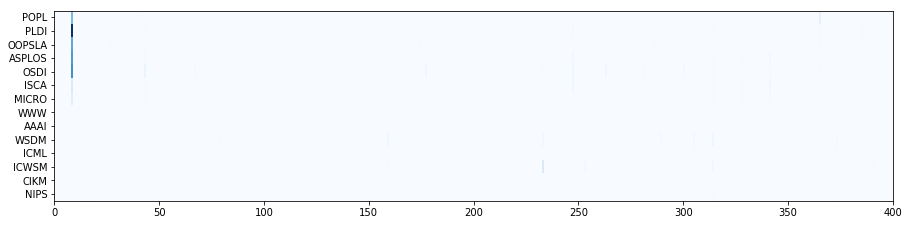

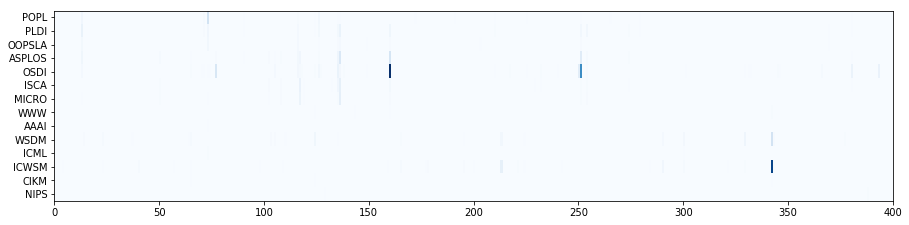

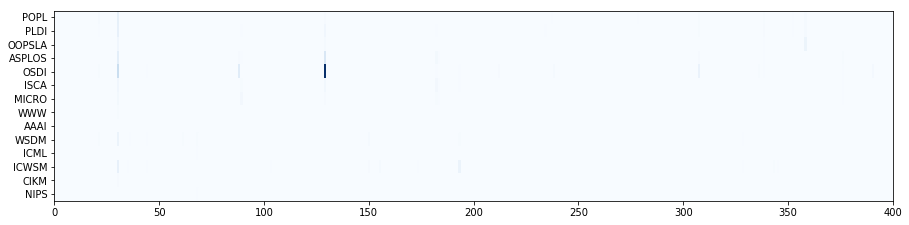

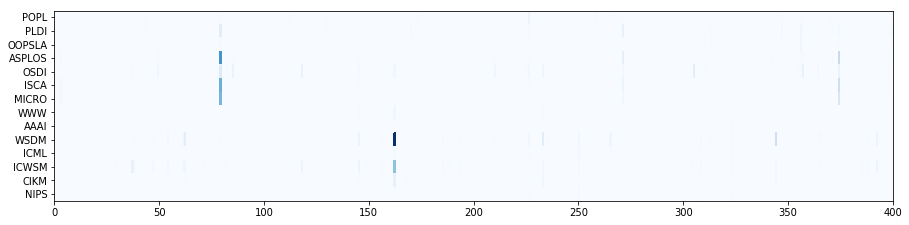

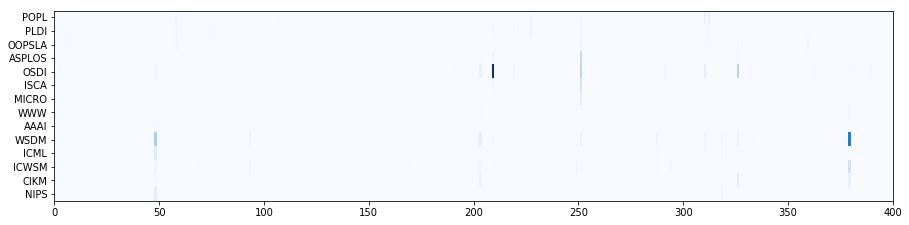

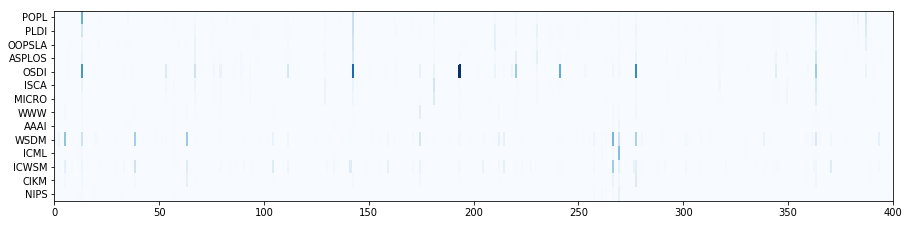

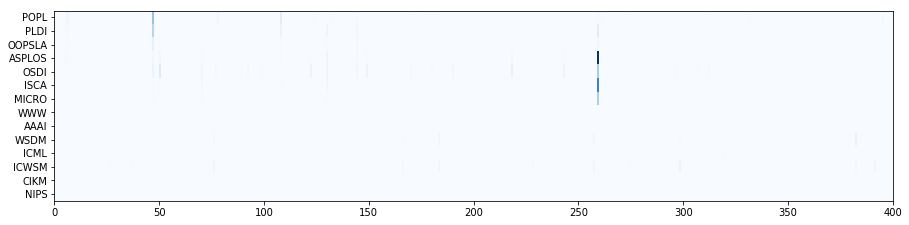

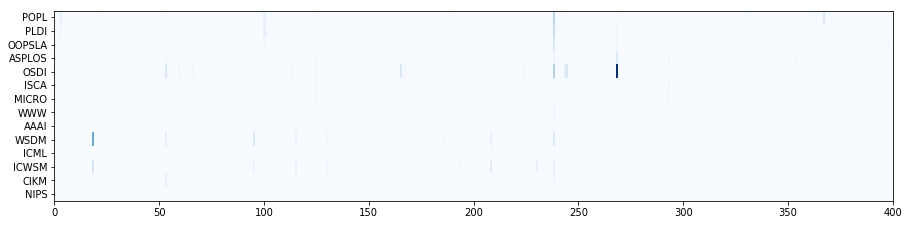

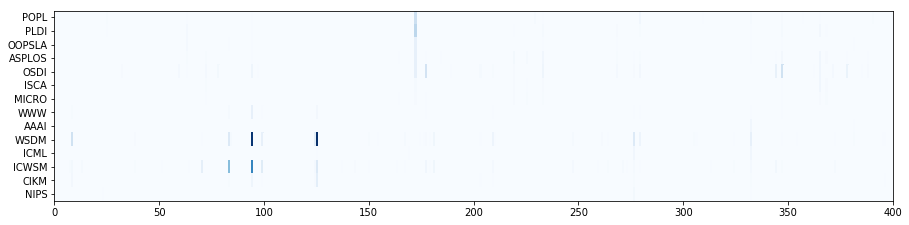

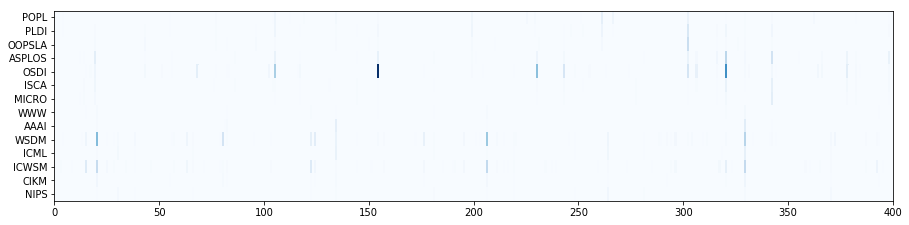

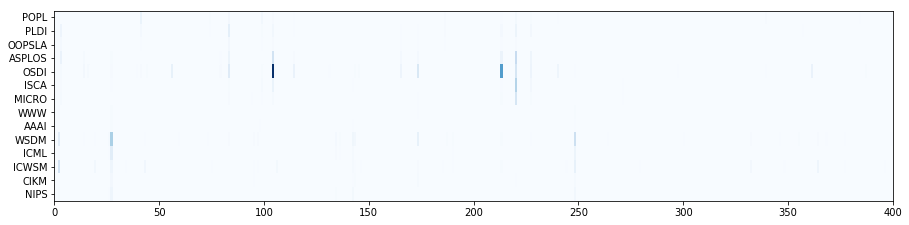

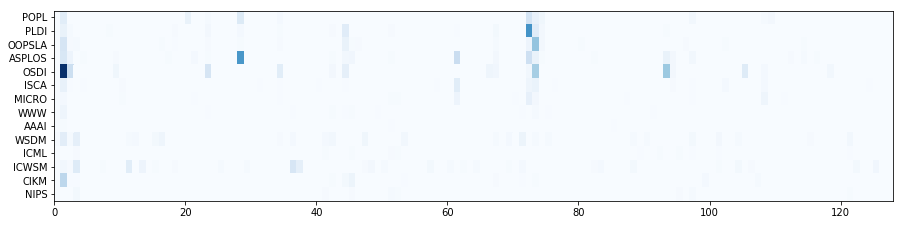

In [39]:
for i in range(1, number_of_venues, x_range):
    draw_heatmap(arr[:14,i:i+x_range], row_labels)